In [9]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



Accuracy: 0.6783536585365854
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       412
           1       0.63      0.32      0.43       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.60       656
weighted avg       0.67      0.68      0.65       656



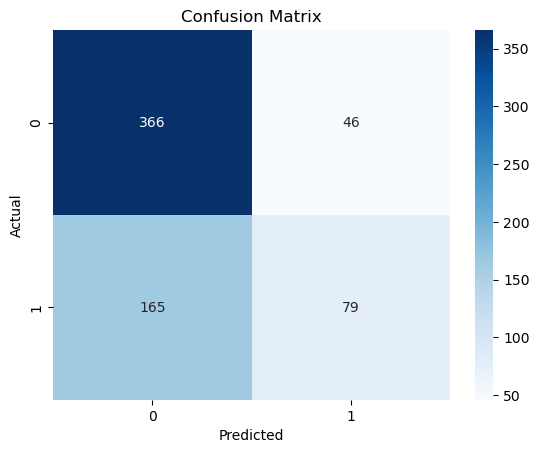

In [10]:
# model_training.py

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("water_potability (1).csv")
df.fillna(df.mean(), inplace=True)

X = df.drop("Potability", axis=1)
y = df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Save model
joblib.dump(model, "water_model.pkl")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png")

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [11]:
!curl -X POST http://localhost:5000/predict \
-H "Content-Type: application/json" \
-d '[{"ph":7.1, "Hardness": 180, "Solids":10000, "Chloramines":8.0, "Sulfate":300, "Conductivity":450, "Organic_carbon":15, "Trihalomethanes":65, "Turbidity":4.0}]'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
curl: (7) Failed to connect to localhost port 5000 after 2238 ms: Couldn't connect to server
curl: (3) URL rejected: Port number was not a decimal number between 0 and 65535
curl: (3) URL rejected: Bad hostname
curl: (3) URL rejected: Port number was not a decimal number between 0 and 65535
curl: (3) URL rejected: Port number was not a decimal number between 0 and 65535
curl: (3) URL rejected: Port number was not a decimal number between 0 and 65535
curl: (3) URL rejected: Port number was not a decimal number between 0 

In [12]:
import streamlit as st
import pandas as pd
import joblib

st.title("💧 Water Potability Prediction")

model = joblib.load("water_model.pkl")

# Input sliders
ph = st.slider("pH", 0.0, 14.0, 7.0)
hardness = st.number_input("Hardness", 0, 500, 150)
solids = st.number_input("Solids", 1000, 50000, 10000)
chloramines = st.slider("Chloramines", 0.0, 15.0, 7.0)
sulfate = st.slider("Sulfate", 100.0, 500.0, 300.0)
conductivity = st.number_input("Conductivity", 100, 1000, 450)
organic = st.slider("Organic Carbon", 2.0, 30.0, 15.0)
trihalo = st.slider("Trihalomethanes", 0.0, 100.0, 60.0)
turbidity = st.slider("Turbidity", 0.0, 10.0, 4.0)

data = pd.DataFrame([{
    "ph": ph, "Hardness": hardness, "Solids": solids,
    "Chloramines": chloramines, "Sulfate": sulfate,
    "Conductivity": conductivity, "Organic_carbon": organic,
    "Trihalomethanes": trihalo, "Turbidity": turbidity
}])

if st.button("Predict"):
    prediction = model.predict(data)[0]
    st.success("✅ Safe to drink" if prediction == 1 else "⚠️ Unsafe to drink")
